In [1]:
#### IMPORT DEPENDENCIES ####

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/home/ujwal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#### READ DATA ####

mydata = pd.read_csv("/home/ujwal/CS-660/project3/bank_data.csv", header=0)

In [3]:
mydata = mydata.dropna()

In [4]:
type(mydata)

pandas.core.frame.DataFrame

In [5]:
mydata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [6]:
print(mydata.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [7]:
mydata['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [8]:
mydata['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [9]:
#### CATEGORIZING DATA ####

mydata['education']=np.where(mydata['education'] =='basic.9y', 'Basic', mydata['education'])
mydata['education']=np.where(mydata['education'] =='basic.6y', 'Basic', mydata['education'])
mydata['education']=np.where(mydata['education'] =='basic.4y', 'Basic', mydata['education'])

In [10]:
mydata['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [11]:
mydata['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [12]:
####### DATA EXPLORATION ######

ax = sns.barplot(x=mydata.y.value_counts().index, y=mydata.y.value_counts())

In [13]:
ax.set(xlabel="Yes /No", ylabel="Count")

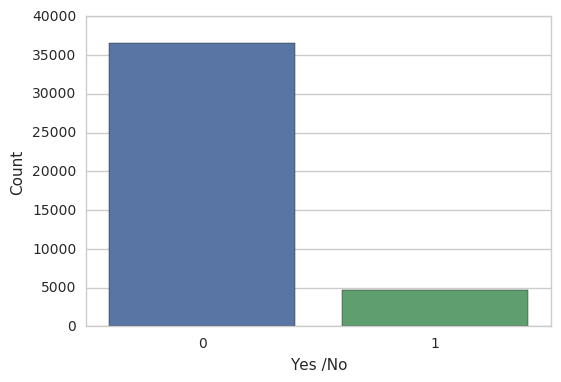

In [14]:
plt.show()

In [15]:
jobplot = sns.countplot(x='job', hue='y', data=mydata, palette="hls")

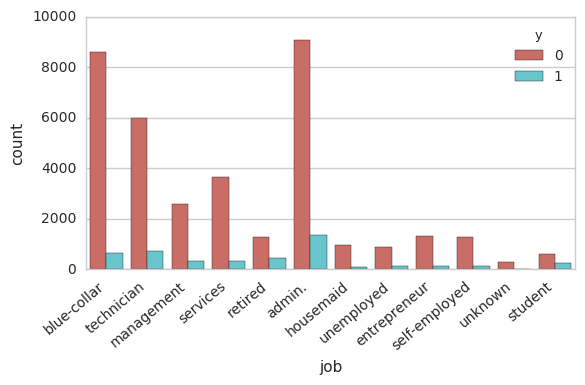

In [16]:
jobplot.set_xticklabels(jobplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

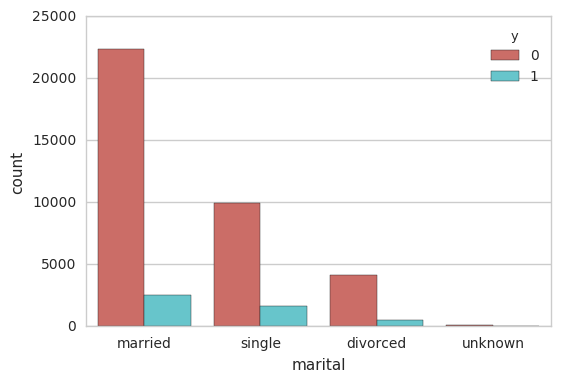

In [65]:
maritalplot = sns.countplot(x="marital", hue='y', data=mydata, palette="hls")
plt.show()

In [17]:
creditplot = sns.countplot(x='default', hue='y', data=mydata, palette='hls')

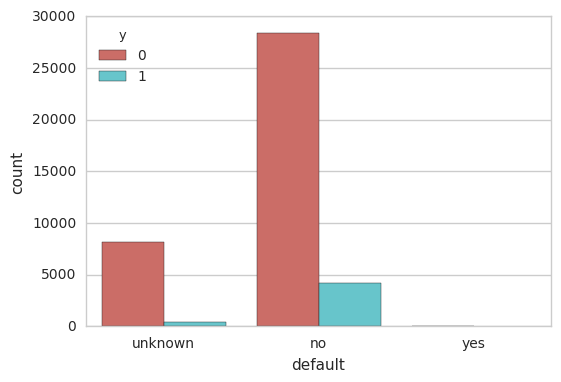

In [18]:
plt.show()

In [20]:
housing_loanplot = sns.barplot(x=mydata.housing.value_counts().index, y=mydata.housing.value_counts())

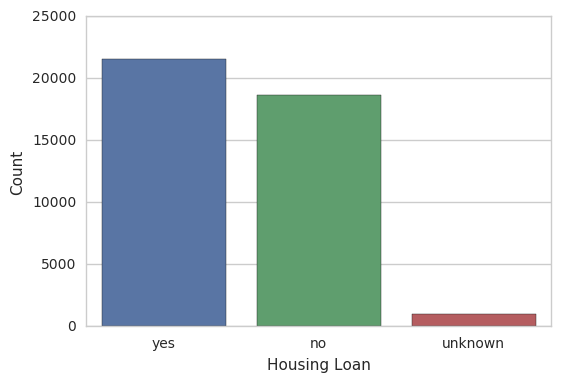

In [21]:
housing_loanplot.set(xlabel="Housing Loan", ylabel="Count")
plt.show()

In [57]:
personal_loanplot = sns.barplot(x=mydata.loan.value_counts().index, y=mydata.loan.value_counts())

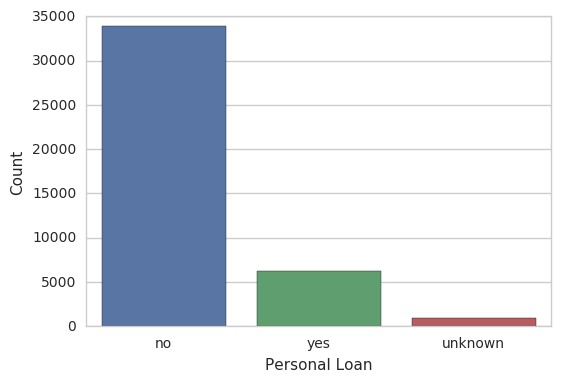

In [59]:
personal_loanplot.set(xlabel="Personal Loan", ylabel="Count")
plt.show()

In [22]:
outcome_plot = sns.barplot(x=mydata.poutcome.value_counts().index, y=mydata.poutcome.value_counts())

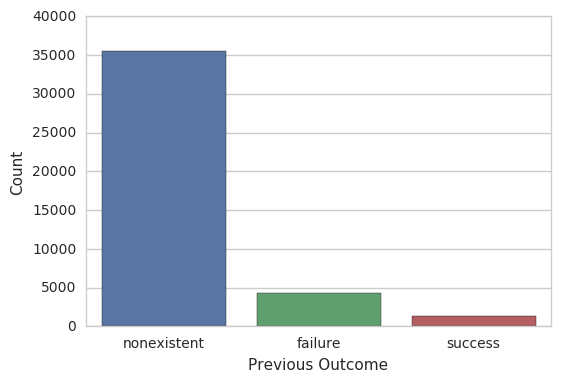

In [23]:
outcome_plot.set(xlabel="Previous Outcome", ylabel="Count")
plt.show()

In [37]:
### Create Dummy variables using Pandas get_dummies() ###
df_with_dummies= pd.get_dummies(mydata, prefix=['job_', 'marital_', 'default_credit_', 'housing_', 'loan_', 'poutcome_'], columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'], drop_first= 'true')

In [38]:
type(df_with_dummies)

pandas.core.frame.DataFrame

In [39]:
df_with_dummies.to_excel("/home/ujwal/dummies.xlsx")

In [40]:
df_with_dummies.columns

Index(['age', 'education', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job__blue-collar',
       'job__entrepreneur', 'job__housemaid', 'job__management',
       'job__retired', 'job__self-employed', 'job__services', 'job__student',
       'job__technician', 'job__unemployed', 'job__unknown',
       'marital__married', 'marital__single', 'marital__unknown',
       'default_credit__unknown', 'default_credit__yes', 'housing__unknown',
       'housing__yes', 'loan__unknown', 'loan__yes', 'poutcome__nonexistent',
       'poutcome__success'],
      dtype='object')

In [46]:
#### Selecting appropriate variables for the prediction ####
del df_with_dummies['education']
del df_with_dummies['month']
del df_with_dummies['contact']
del df_with_dummies['day_of_week']
df_dummy_vars = df_with_dummies.columns.tolist()

In [47]:
y = ['y']
X=[i for i in df_dummy_vars if i not in y]

In [48]:
print(X)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job__blue-collar', 'job__entrepreneur', 'job__housemaid', 'job__management', 'job__retired', 'job__self-employed', 'job__services', 'job__student', 'job__technician', 'job__unemployed', 'job__unknown', 'marital__married', 'marital__single', 'marital__unknown', 'default_credit__unknown', 'default_credit__yes', 'housing__unknown', 'housing__yes', 'loan__unknown', 'loan__yes', 'poutcome__nonexistent', 'poutcome__success']


In [49]:
df_with_dummies.columns.values



array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job__blue-collar', 'job__entrepreneur', 'job__housemaid',
       'job__management', 'job__retired', 'job__self-employed',
       'job__services', 'job__student', 'job__technician',
       'job__unemployed', 'job__unknown', 'marital__married',
       'marital__single', 'marital__unknown', 'default_credit__unknown',
       'default_credit__yes', 'housing__unknown', 'housing__yes',
       'loan__unknown', 'loan__yes', 'poutcome__nonexistent',
       'poutcome__success'], dtype=object)

In [50]:
#### Selecting features ####

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(df_with_dummies[X], df_with_dummies[y] )
print(rfe.support_)
print(rfe.ranking_)

/home/ujwal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False  True False  True  True  True  True  True False  True  True
 False False  True False  True  True  True False False  True  True False
  True False False False False  True  True  True]
[ 6  5  1 11  1  1  1  1  1  3  1  1 10  9  1 12  1  1  1  2 13  1  1 14  1
 15  7  4  8  1  1  1]


In [71]:
cols_final = []
cols_final.append(df_with_dummies.columns.values[11])
cols_final.append(df_with_dummies.columns.values[14])
cols_final.append(df_with_dummies.columns.values[16])
cols_final.append(df_with_dummies.columns.values[17])
cols_final.append(df_with_dummies.columns.values[18])
cols_final.append(df_with_dummies.columns.values[21])
cols_final.append(df_with_dummies.columns.values[22])
cols_final.append(df_with_dummies.columns.values[24])
cols_final.append(df_with_dummies.columns.values[29])
cols_final.append(df_with_dummies.columns.values[30])
cols_final.append(df_with_dummies.columns.values[31])
cols_final

['job__blue-collar',
 'job__management',
 'job__self-employed',
 'job__services',
 'job__student',
 'job__unknown',
 'marital__married',
 'marital__unknown',
 'loan__unknown',
 'loan__yes',
 'poutcome__nonexistent']

In [72]:
X = df_with_dummies[cols_final]
Y= df_with_dummies['y']

In [75]:
Y

0        0
1        0
2        1
3        0
4        1
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       1
17       1
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    0
41159    0
41160    0
41161    0
41162    0
41163    0
41164    0
41165    0
41166    0
41167    0
41168    0
41169    0
41170    0
41171    0
41172    1
41173    0
41174    0
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    0
41182    0
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, dtype: int64

In [76]:
### Implementing model using Logit() methon on the training data which includes the categorical (binary) values of variables: 
### job, marital, default, loan, housing, poutcome 
### Printing the summary using result.summary()

import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.337784
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41177
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Dec 2017   Pseudo R-squ.:                 0.04046
Time:                        22:26:27   Log-Likelihood:                -13913.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                7.829e-246
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
job__blue-collar         -0.8334      0.046    -18.184      0.000        -0.923    -0.

In [77]:
#### Fitting the model using training and testing data ####
#1 Splitting the data in four parts X_train, X_test, Y_train, Y_test
#2 Adding the dependencies for logistic regression
#3 Implementing the logistic regression method using the training data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
### Predicting the result using predict() method ### 

y_pred = logreg.predict(X_test)

numpy.ndarray

In [81]:
## Creating Confusion matrix ##

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[10927    54]
 [ 1337    39]]


In [83]:
### Calculating the ACCURACY using score() method ###
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [ ]:
df